In [1]:
# Import necessary libraries
# 导入必要的库
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import pycountry
import folium
import requests

# import data 
salaries = pd.read_csv("ds_salaries.csv")

# View data summary
# 查看数据摘要
print(salaries.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None


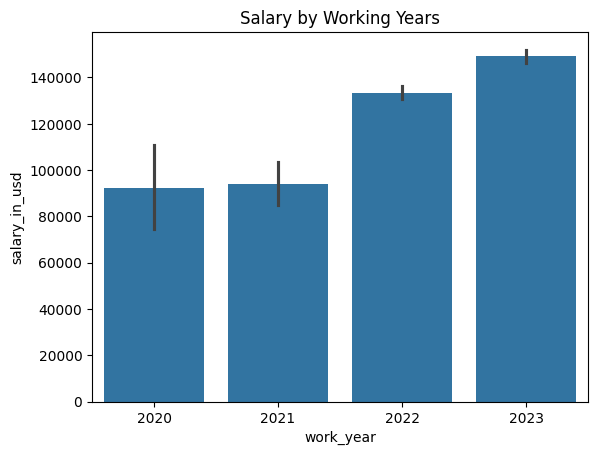

In [2]:

# Preliminary analysis of data
# 数据初步解析

# Bar chart classified by working years
sns.barplot(
    x = 'work_year',
    y = 'salary_in_usd',
    data = salaries,
)

# Add title
plt.title('Salary by Working Years')

# Show graphics
plt.show()

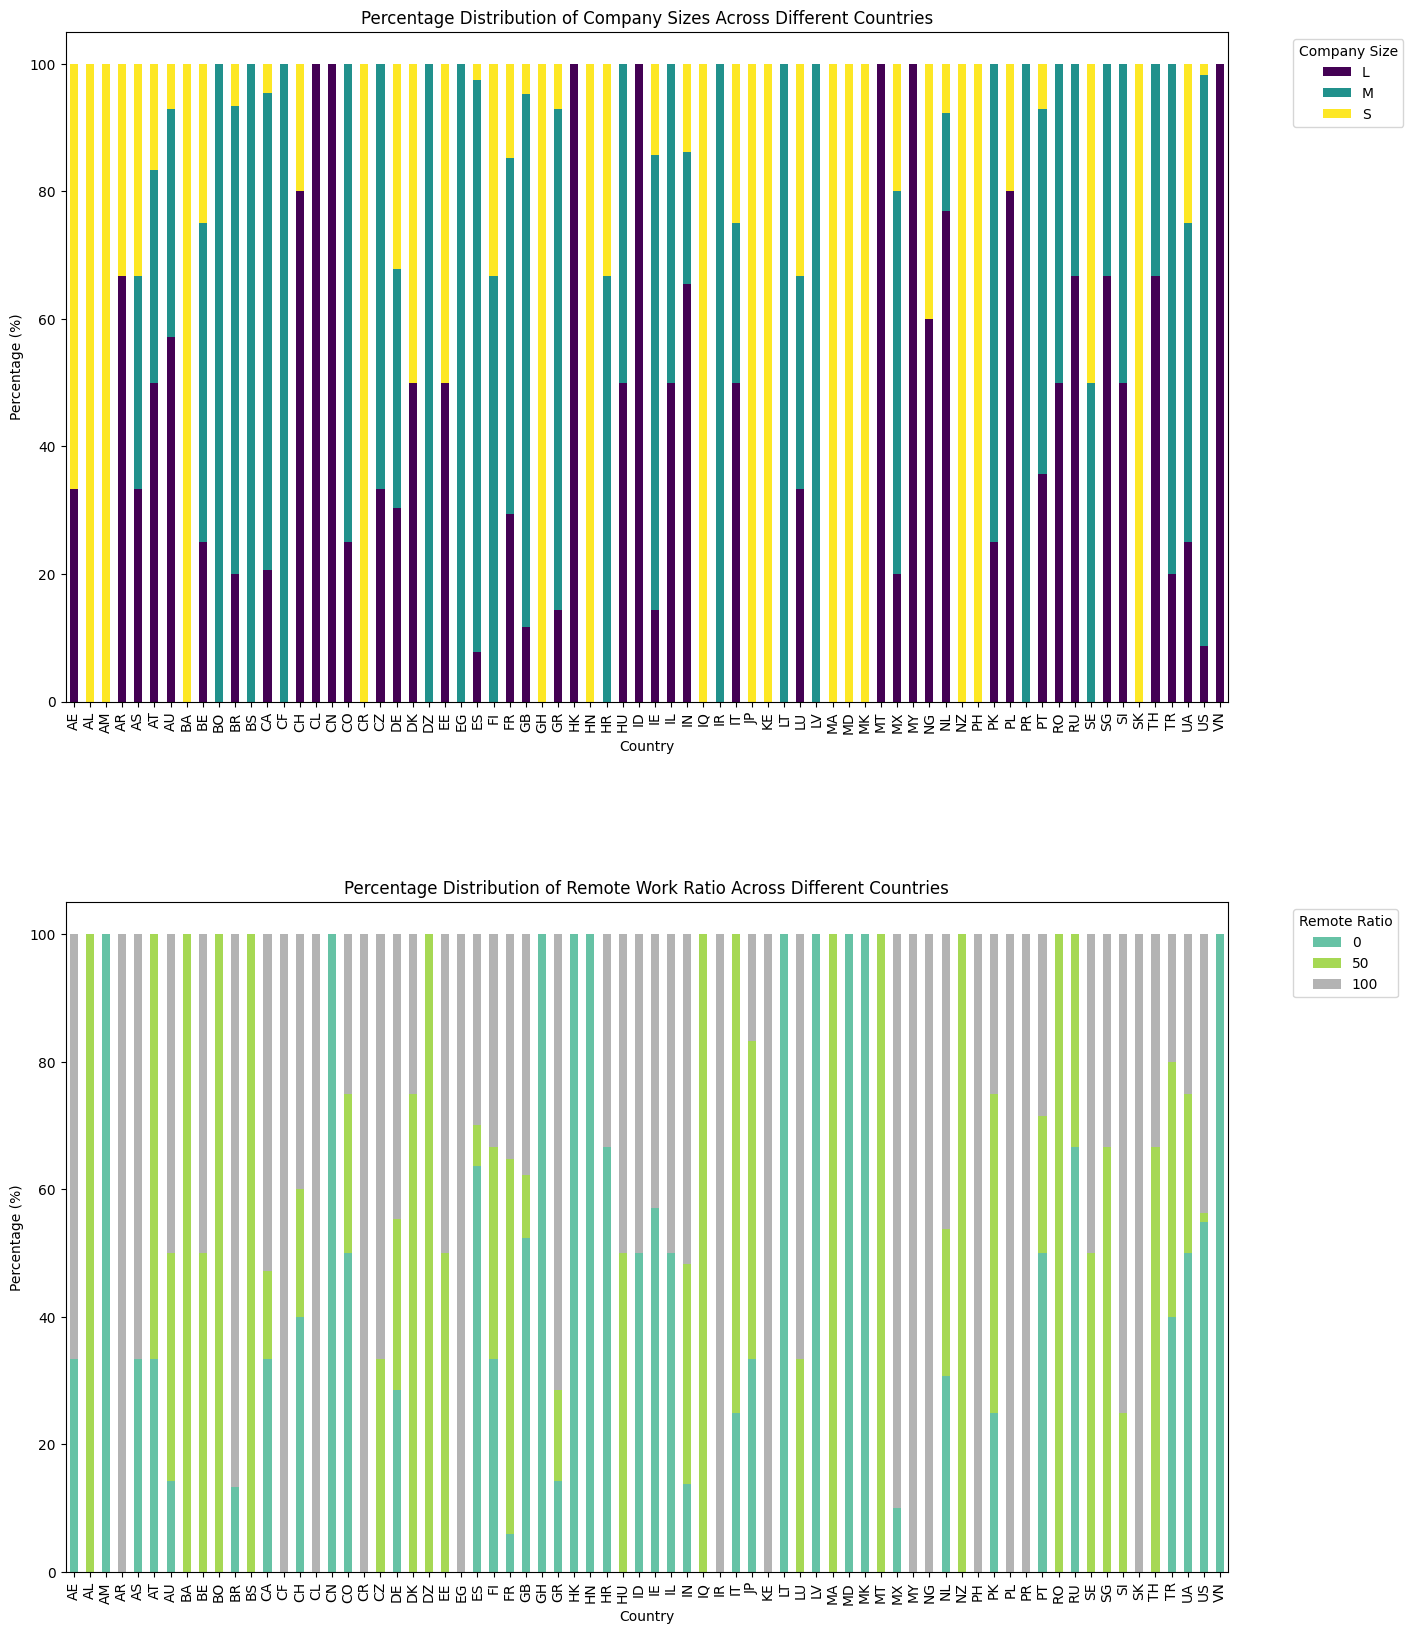

In [3]:

# Preparing data for the first visualization (stacked bar chart for company sizes)
# 为第一次可视化准备数据（公司规模的堆积条形图）
company_distribution = salaries.groupby(['company_location', 'company_size']).size().unstack(fill_value=0)
salaries_stacked_bar = company_distribution.div(company_distribution.sum(axis=1), axis=0) * 100  # Convert to percentage # 转换为百分比

# Preparing data for the second visualization (percentage of remote workers by country)
# 为第二次可视化准备数据（按国家/地区划分的远程工作人员的百分比）
remote_distribution = salaries.groupby(['company_location', 'remote_ratio']).size().unstack(fill_value=0)
salaries_remote_percentage = remote_distribution.div(remote_distribution.sum(axis=1), axis=0) * 100  # Convert to percentage # 转换为百分比

# Adjusting the layout to display the charts one above the other(vertical display)
# 调整布局以将图表一层一层地显示（垂直显示）
plt.figure(figsize = (15, 20))

# First Plot (Company Sizes)
# 第一个地块（公司规模）
plt.subplot(2, 1, 1)  # This will be the first plot in a 2x1 grid # 这将是 2x1 网格中的第一个图

# Plotting the data using a stacked bar chart
# 使用堆积条形图绘制数据
salaries_stacked_bar.plot(
    kind = 'bar', 
    stacked = True, # Stack the bars on top of each other # 将条形图叠加在一起
    colormap = 'viridis', # Use the 'viridis' color map for the bars  # 使用'viridis'色彩映射设置条形颜色
    ax = plt.gca() # Use the current Axes (gca) for plotting # 使用当前的坐标轴进行绘制 
)
plt.title('Percentage Distribution of Company Sizes Across Different Countries')
plt.ylabel('Percentage (%)')
plt.xlabel('Country')
plt.legend(
    title = 'Company Size', 
    bbox_to_anchor = (1.05, 1), # Place the legend at coordinates (1.05, 1), outside the axis # 将图例放置在坐标 (1.05, 1)，即轴外的位置
    loc = 'upper left' # Position the legend in the upper-left corner # 将图例放置在左上角
)
plt.xticks(rotation=90)

# Second Plot (Remote Ratios)
# 第二幅图（远程比率）
plt.subplot(2, 1, 2)  # This will be the second plot in a 2x1 grid # 这将是 2x1 网格中的第二个图
salaries_remote_percentage.plot(
    kind = 'bar', 
    stacked = True, # Stack the bars on top of each other # 将条形图叠加在一起
    colormap = 'Set2', # Use the 'Set2' color map for the bars  # 使用'Set2'色彩映射设置条形颜色
    ax = plt.gca()
)
plt.title('Percentage Distribution of Remote Work Ratio Across Different Countries')
plt.ylabel('Percentage (%)')
plt.xlabel('Country')

# Adding a legend for the Remote Ratio plot
# 为远程比率图添加图例
plt.legend(
    title = 'Remote Ratio',  # Set the legend title to 'Remote Ratio' # 图例标题为“Remote Ratio”  
    bbox_to_anchor = (1.05, 1), # Place the legend at coordinates (1.05, 1), outside the axis # 将图例放置在坐标 (1.05, 1)，即轴外的位置 
    loc = 'upper left' # Position the legend in the upper-left corner # 将图例放置在左上角 
)

# Rotate X-axis tick labels by 90 degrees for better visibility
# 调整X轴刻度标签的旋转角度为90度，以便更好地显示
plt.xticks(rotation = 90)

# Adjust the vertical spacing between subimages
# 调整子图之间的垂直间距
plt.subplots_adjust(hspace = 0.3)
plt.show()


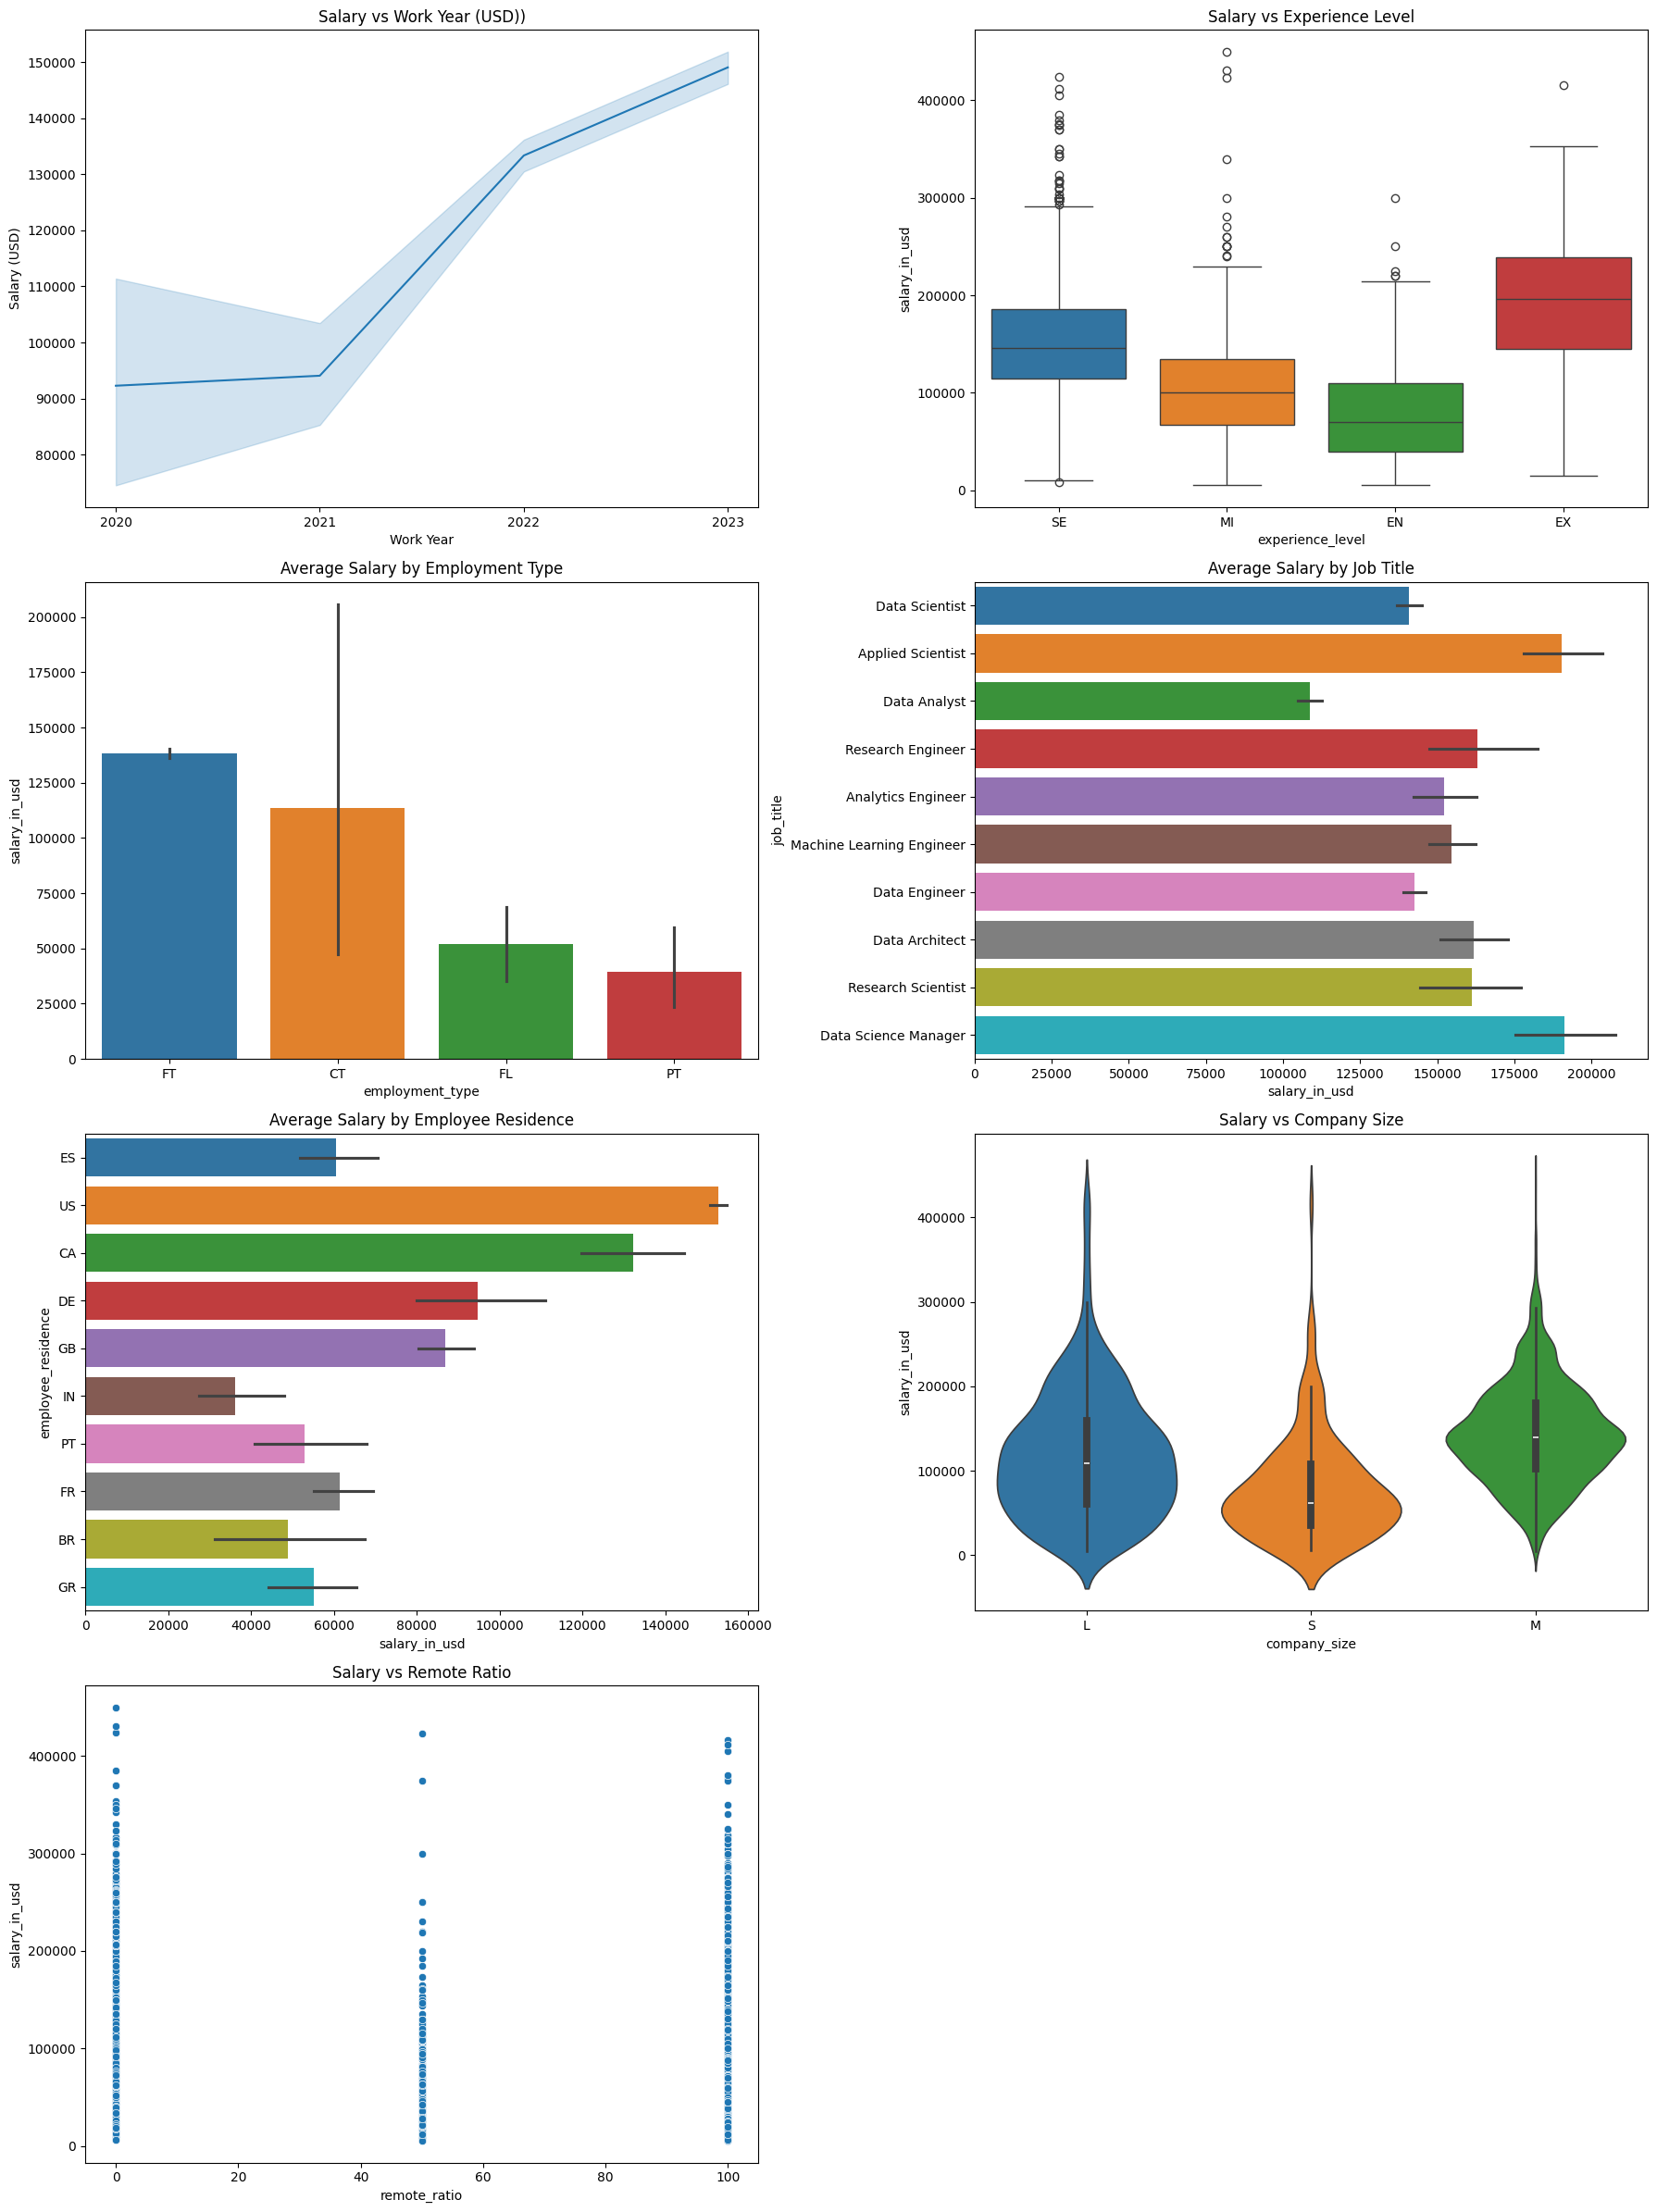

Analysis results:XXXXXXX


In [4]:
# Analyzing the impact of different factors on salary
# 分析不同要素对薪资的影响关系

# Setting up the matplotlib figure
# 设置matplotlib图形
plt.figure(figsize = (18, 24))

# 1. Work Year vs Salary
# 1. 工作年份与薪资
plt.subplot(4, 2, 1)
sns.lineplot(
    x = 'work_year', 
    y = 'salary_in_usd',
    data = salaries, 
)
plt.xticks(salaries['work_year'].unique())   # 设置x轴刻度为工作年份，无小数点   # Set x-axis ticks to work years, no decimal points
plt.title('Salary vs Work Year (USD))')
plt.xlabel('Work Year')
plt.ylabel('Salary (USD)')

# 2. Experience Level vs Salary
# 2. 经验水平 vs 薪资
plt.subplot(4, 2, 2)
sns.boxplot(
    x = 'experience_level',
    y = 'salary_in_usd', 
    data = salaries,
    hue = 'experience_level'
)
plt.title('Salary vs Experience Level')

# 3. Employment Type vs Salary
# 3. 雇佣类型与薪资
plt.subplot(4, 2, 3)
sns.barplot(
    x = 'employment_type', 
    y = 'salary_in_usd', 
    data = salaries, 
    hue = 'employment_type'
)
plt.title('Average Salary by Employment Type')

# 4. Job Title vs Salary
# 4. 职位名称与薪资
plt.subplot(4, 2, 4)
top_job_titles = salaries['job_title'].value_counts().head(10).index
sns.barplot(
    y = 'job_title',
    x = 'salary_in_usd', 
    data = salaries[salaries['job_title'].isin(top_job_titles)],
    hue = 'job_title'
)

plt.title('Average Salary by Job Title')

# 5. Employee Residence vs Salary
# 5. 员工居住地与薪资
plt.subplot(4, 2, 5)
top_countries = salaries['employee_residence'].value_counts().head(10).index
sns.barplot(
    y = 'employee_residence', 
    x = 'salary_in_usd', 
    data = salaries[salaries['employee_residence'].isin(top_countries)],
    hue = 'employee_residence'
)
plt.title('Average Salary by Employee Residence')

# 6. Company Size vs Salary
# 6. 公司规模 vs 薪资
plt.subplot(4, 2, 6)
sns.violinplot(
    x = 'company_size',
    y = 'salary_in_usd', 
    data = salaries,
    hue = 'company_size'
)
plt.title('Salary vs Company Size')

# 7. Remote Ratio vs Salary
# 7. 远程比例 vs 薪资
plt.subplot(4, 2, 7)
sns.scatterplot(
    x = 'remote_ratio',
    y = 'salary_in_usd', 
    data = salaries
)
plt.title('Salary vs Remote Ratio')

# show pictures
# 图片展示
plt.tight_layout()
plt.show()

# Print the conclusion
# 打印结论
print("Analysis results:XXXXXXX")


In [5]:
# Function to map country codes to ISO Alpha-3 codes
# 将国家代码映射到 ISO Alpha-3 代码的函数
def map_country_codes(country_codes):
    map_main = {} # Create an empty dictionary to store country code mapping relationships # 创建一个空字典，用于存储国家代码映射关系
    for code in country_codes:
        country = pycountry.countries.get(alpha_2=code) # Get the corresponding country object through the two-digit country code # 通过两位国家代码获取对应的国家对象
        if country:
            map_main[code] = country.alpha_3 # If the corresponding country object is found, map the two-digit code to the three-digit code # 如果找到对应的国家对象，则将两位代码映射到三位代码
        else:
            country = pycountry.countries.get(name=code) # If the corresponding country object is not found, obtain it through the country name. # 如果未找到对应的国家对象，则通过国家名称获取
            if country:
                map_main[code] = country.alpha_3  # If the corresponding country object is found, map the input code to a three-digit code # 如果找到对应的国家对象，则将输入代码映射到三位代码
            else:
                map_main[code] = code  # If the corresponding country object is not found, keep the original code # 如果未找到对应的国家对象，则保留原始代码
    return map_main # Return the complete country code mapping dictionary # 返回完整的国家代码映射字典


# Get unique country codes
# 获取唯一的国家代码
worker_countries_unique = salaries['employee_residence'].unique() # Get a unique list of countries where all employees live # 获取所有雇员居住地的唯一国家/地区列表
company_countries_unique = salaries['company_location'].unique() # Get a unique country list of all company locations # 获取所有公司位置的唯一国家/地区列表
unique_countries_all = set(worker_countries_unique) | set(company_countries_unique) # Combine unique country lists of employee residence and company location, removing duplicates # 合并雇员居住地和公司位置的唯一国家/地区列表，去除重复项

# Generate country code mapping
# 生成国家代码映射
country_code_to_iso = map_country_codes(unique_countries_all)

# Apply the mapping to the dataset
# 将映射应用到数据集
salaries['employee_residence_iso'] = salaries['employee_residence'].map(country_code_to_iso)
salaries['company_location_iso'] = salaries['company_location'].map(country_code_to_iso)

# Display the mapping and the first few rows of the updated dataset
# 显示映射和更新数据集的前几行
country_code_to_iso, salaries.head()


({'CO': 'COL',
  'GB': 'GBR',
  'SK': 'SVK',
  'CF': 'CAF',
  'UZ': 'UZB',
  'RS': 'SRB',
  'CA': 'CAN',
  'PL': 'POL',
  'FR': 'FRA',
  'BS': 'BHS',
  'PK': 'PAK',
  'SI': 'SVN',
  'DZ': 'DZA',
  'GR': 'GRC',
  'CZ': 'CZE',
  'AT': 'AUT',
  'PR': 'PRI',
  'RU': 'RUS',
  'AM': 'ARM',
  'IQ': 'IRQ',
  'LV': 'LVA',
  'IT': 'ITA',
  'BA': 'BIH',
  'MY': 'MYS',
  'UA': 'UKR',
  'KW': 'KWT',
  'NG': 'NGA',
  'PT': 'PRT',
  'NZ': 'NZL',
  'RO': 'ROU',
  'AS': 'ASM',
  'BO': 'BOL',
  'LT': 'LTU',
  'AU': 'AUS',
  'MT': 'MLT',
  'CY': 'CYP',
  'CL': 'CHL',
  'HU': 'HUN',
  'VN': 'VNM',
  'HN': 'HND',
  'CH': 'CHE',
  'MK': 'MKD',
  'IR': 'IRN',
  'SE': 'SWE',
  'EE': 'EST',
  'US': 'USA',
  'IN': 'IND',
  'IE': 'IRL',
  'HK': 'HKG',
  'MX': 'MEX',
  'BR': 'BRA',
  'DE': 'DEU',
  'LU': 'LUX',
  'ID': 'IDN',
  'TN': 'TUN',
  'HR': 'HRV',
  'DO': 'DOM',
  'GH': 'GHA',
  'IL': 'ISR',
  'ES': 'ESP',
  'CR': 'CRI',
  'AL': 'ALB',
  'MD': 'MDA',
  'SG': 'SGP',
  'EG': 'EGY',
  'TH': 'THA',
  'CN': 'C

In [6]:
# Calculate the average salary for each country
# 计算每个国家的平均工资
salary_by_country_average = salaries.groupby('employee_residence_iso')['salary_in_usd'].mean().reset_index()

# Load GeoJSON data (used to draw country borders on the map)
# 加载 GeoJSON 数据（用于在地图上绘制国家边界）
geojson_url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'
geojson_data = requests.get(geojson_url).json()

# Create base map
# 创建基础地图
m = folium.Map(
    location = [0, 0], # Set the map center position coordinates [latitude, longitude] # 设定地图中心位置坐标 [纬度, 经度] 
    zoom_start = 2, # Set initial zoom level # 设定初始缩放级别 
    min_zoom = 2, # Set minimum zoom level # 设定最小缩放级别 
    max_bounds = True, # Turn on the maximum boundary limit of the map # 开启地图最大边界限制
    min_lon = -180, # Set the minimum longitude value # 设定最小经度值
    max_lon = 180, # Set the maximum longitude value # 设定最大经度值
    min_lat = -90, # Set the minimum latitude value # 设定最小纬度值
    max_lat = 90 # Set the maximum latitude value # 设定最大纬度值
)

# Add country borders and salary data to the map
# 添加国家边界和工资数据到地图
def get_color(salary_average):
    if pd.isna(salary_average):
        return 'gray'  # For countries with no data, use gray # 对于没有数据的国家，使用灰色 
    else:
        # Calculate the level of the color. For each additional $20,000, the level increases by 1
        # 计算颜色的级别，每增加20000美元，级别增加1
        color_level = int(salary_average / 20000)
        # Limit the range of color levels
        # 限制颜色级别的范围
        color_level = max(0, min(color_level, 10))
        # Define a color list, gradually changing from green to red
        # 定义颜色列表，从绿色逐渐变为红色
        colors = ['green', 'yellowgreen', 'yellow', 'gold', 'orange', 'darkorange', 'orangered', 'red', 'darkred', 'maroon', 'black']
        return colors[color_level]

# Traverse each country in GeoJSON data
# 遍历GeoJSON数据的每个国家
for country in geojson_data['features']:
    iso_code = country['id']  # Get the country ISO code # 获取国家ISO代码
    
    # Get the average salary in this country and filter using conditions
    # 获取该国家平均工资，使用条件筛选
    salary_average = salary_by_country_average[salary_by_country_average['employee_residence_iso'] == iso_code]['salary_in_usd'].mean()
    
    # Use folium.GeoJson to draw geographic data, setting the style function to determine colors based on average salary
    # 使用folium.GeoJson绘制地理数据，设置样式函数以根据平均工资确定颜色
    folium.GeoJson(
        country,
        style_function=lambda x, salary_average = salary_average: {
            'fillColor': get_color(salary_average), # Get fill color based on average salary # 通过平均工资获取填充颜色
            'color': 'black', # The border color is black # 边框颜色为黑色
            'weight': 1, # Border width is 1 # 边框宽度为1
            'fillOpacity': 0.7, # Fill transparency is 0.7 # 填充透明度为0.7
            'lineOpacity': 0.2  # Border transparency is 0.2 # 边框透明度为0.2
        },
        # Set the tooltip of folium.GeoJson to display the country name and corresponding average salary
        # 设置folium.GeoJson的工具提示，显示国家名称和对应的平均工资
        tooltip = folium.GeoJsonTooltip(fields=['name'], aliases = [f'Average Salary: ${salary_average:.2f}'])
    ).add_to(m) # Add the drawn geographical data to the map # 将绘制的地理数据添加到地图中

# show map
# 显示地图
m.save('C:/Users/fairy/Desktop/assessment2programming/salarymap.html')  # Save map as HTML file # 保存地图为 HTML 文件

